## 儲存格樣式

儲存格的樣式有下列幾個模組功能。
-  Font ：字型樣式，可以設定字體大小、字型、顏色、或是刪除線⋯等。
-  Border：框線樣式，可以設定框線樣式與色彩。
-  PatternFill：填充圖案。
-  Alignment：對齊方式。
-  Protection：保護功能，將在 7-6 節解說。

在使用上述模組前需要先導入模組：
`from openpyxl.styles import Font, Border, Side, PatternFill, Alignment, Protection`


## 字型功能

字型 Font 模組常用的參數預設值如下：
```
Font(name='Calibri',size=11, bold=False, italic=False, vertAlign=None, underline='none', strike=False, color='000000')
```

- name：字型名稱，預設是 Calibri，中文則是系統預設的新細明體。
- size：字型大小，預設是 11。
- bold：粗體，預設是 False。
- italic：斜體，預設是 False。
- vertAlign：垂直置中，預設是 None。
- underline：底線，預設是 none，單底線是 single，雙底線是 double。
- strike：刪除線，預設是 False。
- color：參數的是16位元，設定顏色時前面2個0是設定紅色（Red），中間2個0是設定綠色（Green），右邊2個0是設定藍色（Blue）

In [2]:
import openpyxl
from openpyxl.styles import Font

fn = "示範用excel.xlsx"
# wb = openpyxl.load_workbook(fn)
wb = openpyxl.Workbook()    # 建立空白的活頁簿
ws = wb.active
ws['A1'] = 'Apple'
ws['A1'].font = Font(color='0000FF')

ws['A2'] = 'Orange'
ws['A2'].font = Font(underline='single')

ws['A3'] = "Yellow"
ws['A3'].font = Font(underline='double')

ws['A4'] = "Blue"
ws['A4'].font = Font(color='0000FF',italic=True)     

ws['A5'] = "Ming-Chi Institute of Technology"
ws['A5'].font = Font(name='Old English Text MT',color='0000FF')

ws['A6'] = "明志工專"
ws['A6'].font = Font(name='標楷體',color='0000FF')   

## 儲存格空線

使用框線 Border 模組時，需導入 Border 和 Side 模組：
`from openpyxl.styles import Border, Side`



儲存格框線 Border 模組常用的參數預設值如下：
```
Border(left=Side(border_style=None, color='000000'),
    right=Side(border_style=None, color='000000'), top=Side(border_style=None, color='000000'), bottom=Side(border_style=None, color='000000'), diagonal=Side(border_style=None, color='000000'), diagonalDown=False, diagonalUp=False,
    outline=Side(border_style=None, color='000000'), vertical=Side(border_style=None, color='000000'), horizonal=Side(border_style=None, color='000000'))
```

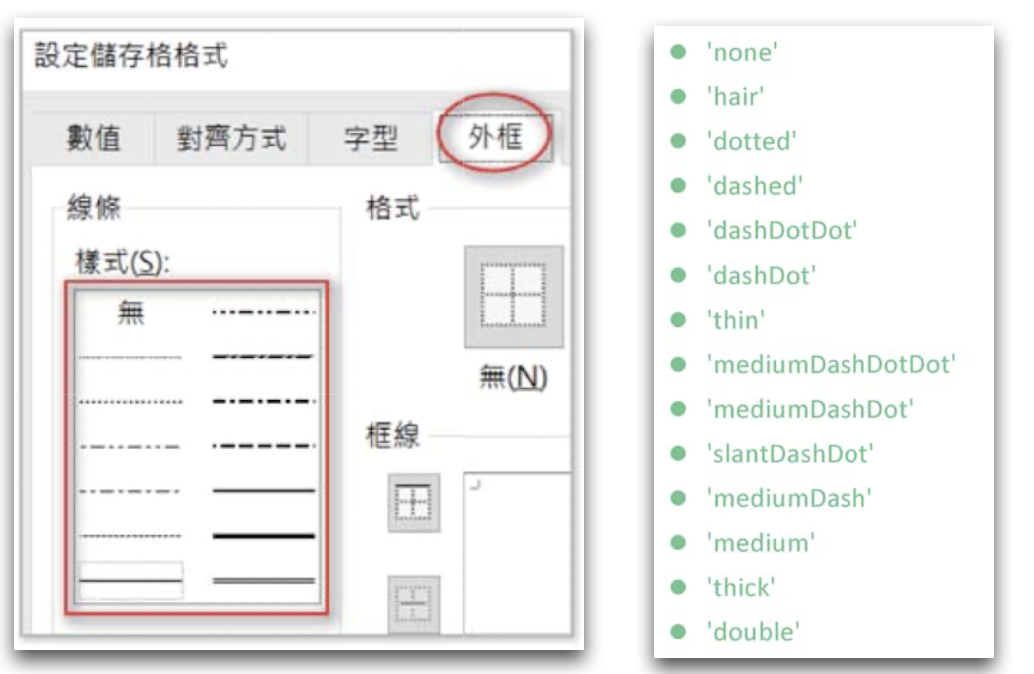


In [3]:
import openpyxl
from openpyxl.styles import Font, Border, Side

wb = openpyxl.Workbook()
ws = wb.active
# 建立含13種框線樣式的串列
border_styles = ['hair','dotted','dashed','dashDotDot',
                 'dashDot','thin','mediumDashDotDot',
                 'mediumDashDot','slantDashDot','mediumDashed', 
                 'medium','thick','double']

# 建立輸出含13個框線的列號串列
rows = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26]

for row, border_style in zip(rows, border_styles): 
    for col in [2, 4, 6]:   # B, D, F 欄        
        if col == 2:        # 如果是 B 欄, 用藍色輸出框線樣式名稱          
            ws.cell(row=row, column=col).value=border_style
            ws.cell(row=row, column=col).font = Font(color='0000FF')
        elif col == 4:      # 如果是 D 欄, 設定左上至右下的紅色對角線
            side = Side(border_style=border_style, color='FF0000')
                            # 建立左上到右下對角線物件
            diagDown = Border(diagonal=side,diagonalDown=True)
                            # 建立紅色對角線
            ws.cell(row=row, column=col).border = diagDown     
        else:               # 如果是 F 欄, 建立框線
            side = Side(border_style=border_style)
                            # 建立儲存格四周的框線
            borders = Border(left=side,right=side,top=side,bottom=side)
            ws.cell(row=row, column=col).border = borders                               
wb.save("格線示範.xlsx")

## 儲存格圖案

使用 PatternFill 模組時，需導入 PatternFill 模組：`from openpyxi.styles import PatternFill`

圖案或是漸變顏色 PatternFill（）函數常用的參數預設值如下：
```
PatternFill(fill _type=None,
fgColor='000000，
bgColor='000000',
start_color='000000',
end_color='000000")
```

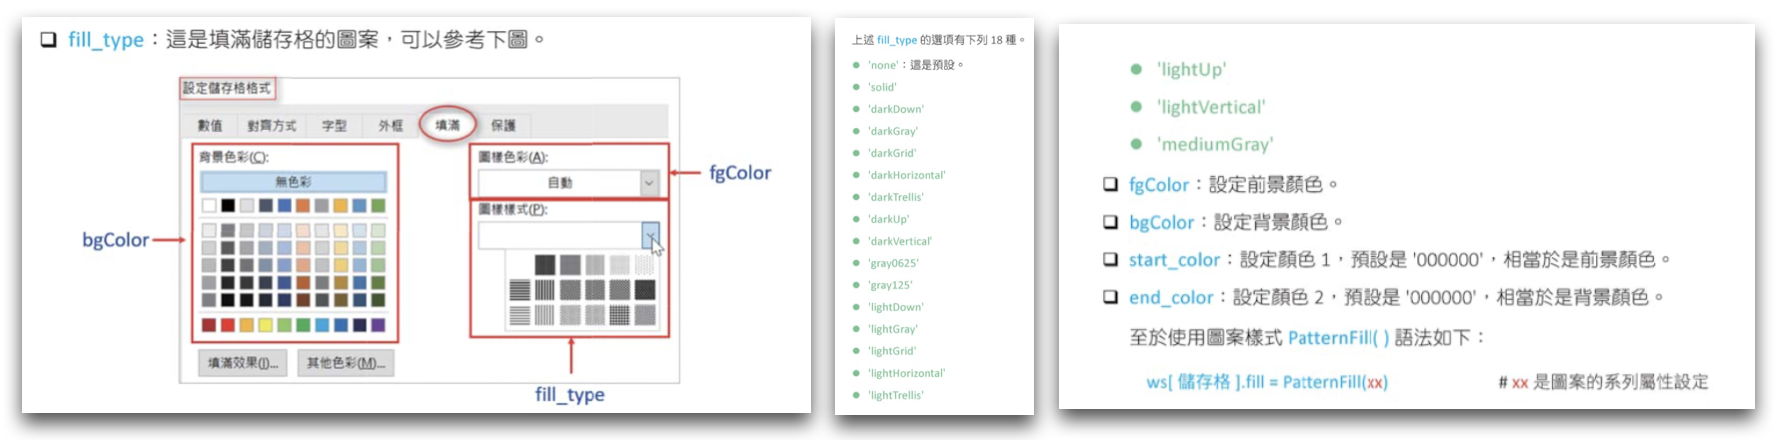

In [4]:
import openpyxl
from openpyxl.styles import PatternFill

wb = openpyxl.Workbook()
ws = wb.active

# 建立圖案樣式串列
patterns = ['solid','darkDown','darkGray',
            'darkGrid','darkHorizontal','darkTrellis',
            'darkUp','darkVertical','gray0625',
            'gray125','lightDown','lightGray',
            'lightGrid','lightHorizontal','lightTrellis',
            'lightUp','lightVertical','mediumGray']       

# 設定儲存格區間
cells = ws.iter_cols(min_row=2,max_row=20,min_col=2,max_col=3)
for col in cells:
    for cell, pattern in zip(col,patterns):         
        if cell.col_idx == 2 :  # 如果是 B 欄則輸出圖案樣式
            cell.fill = PatternFill(fill_type=pattern)     
        else:                   # 否則輸出圖案名稱
            cell.value = pattern  
wb.save("輸出儲存格樣式.xlsx")


In [5]:
import openpyxl
from openpyxl.styles import PatternFill

wb = openpyxl.Workbook()
ws = wb.active

ws['B2'].fill = PatternFill(fill_type='lightGray',
                            fgColor="0000FF")
ws['B4'].fill = PatternFill(fill_type='lightGray',
                            bgColor="0000FF")
ws['B6'].fill = PatternFill(fill_type='lightGray',
                            fgColor="FF00FF",
                            bgColor="FFFF00")
ws['B8'].fill = PatternFill(patternType='lightGray',
                            fgColor="FFFF00",
                            bgColor="FF00FF")
# 也可以用start_color和end_color
ws['B10'].fill = PatternFill(patternType='lightGray',
                             start_color="FFFF00",
                             end_color="FF00FF")
wb.save("輸出儲存格樣式.xlsx")

## 儲存格對齊方式

使用 Alignment 模組時，需導入 Alignment 模組：`from openpyxl.styles import Alignment`


圖案或是漸變顏色 Alignment 模組常用的參數預設值如下：
`Alignment（horizontal=general，vertical='bottom', text_rotation=0, wrap_text=False, shrink_to_fit=False, indent=0)`

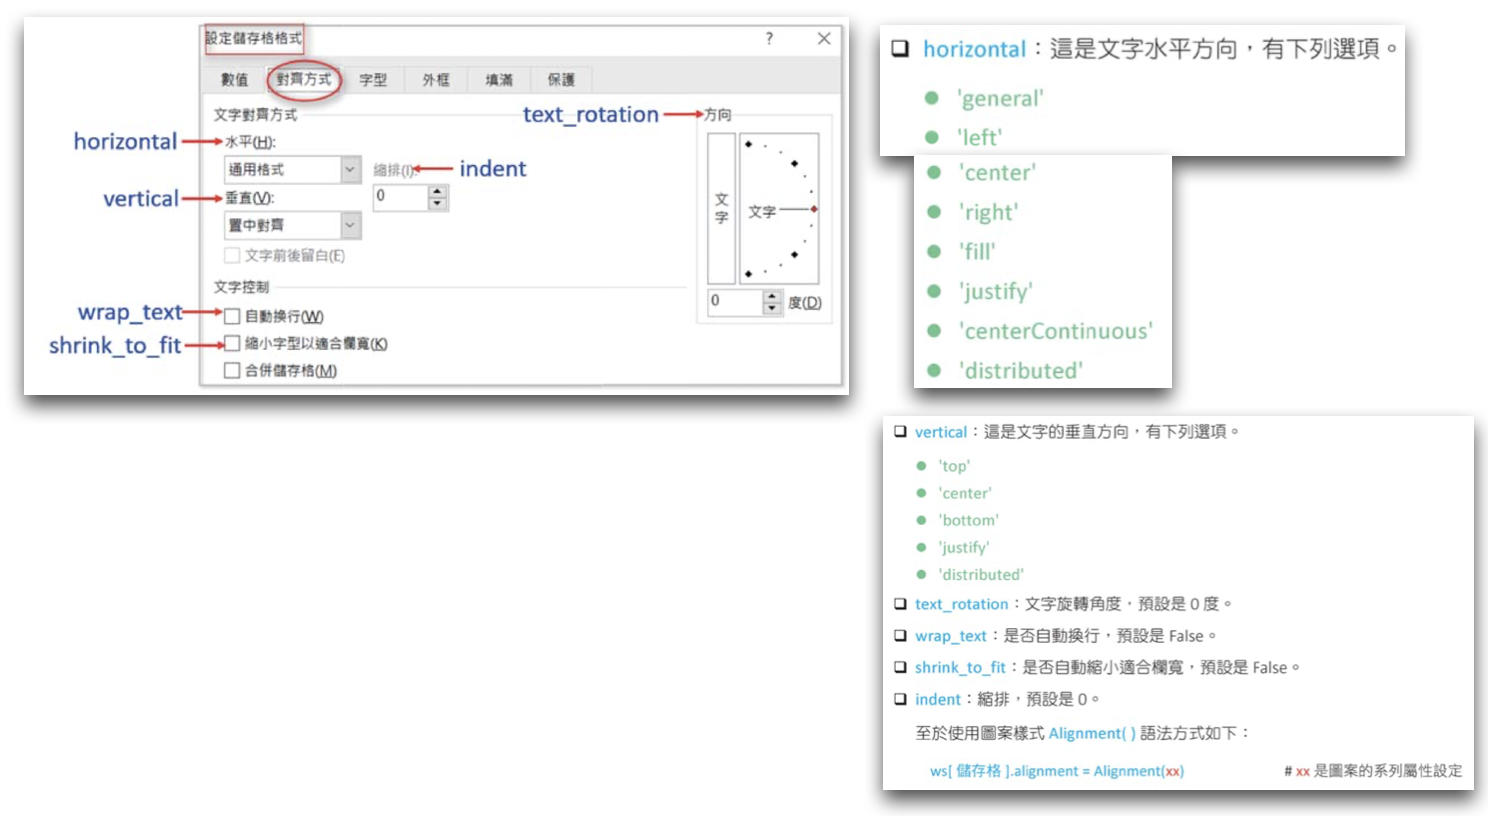

In [6]:
import openpyxl
from openpyxl.styles import Alignment

# fn = "data6_8.xlsx"
wb = openpyxl.Workbook()    # 建立空白的活頁簿
# wb = openpyxl.load_workbook(fn)
ws = wb.active
ws['B2'] = "這是B2"
ws['B2'].alignment = Alignment(horizontal='right')  

ws['C2'] = "this is C2"
ws['C2'].alignment = Alignment(horizontal='center') 

ws['D2'] = "this is D2"
ws['D2'].alignment = Alignment(horizontal='left')

ws['F2'] = "this is F2"
ws['F2'].alignment = Alignment(horizontal='centerContinuous')
wb.save("對齊方式.xlsx")

In [ ]:
import openpyxl
from openpyxl.styles import Border, Side, Alignment

fn = "天空SPA客戶資料.xlsx"
wb = openpyxl.load_workbook(fn)
ws = wb.active

side = Side(border_style='thin')
borders = Border(left=side,right=side,top=side,bottom=side)
for rows in ws['B2':'C6']:
    for cell in rows:
        cell.border = borders
        cell.alignment = Alignment(horizontal='center')
# wb.save("out6_9.xlsx")

## 複製樣式

In [7]:
import openpyxl
from openpyxl.styles import Font
from copy import copy

src = Font(name='Arial', size=16)
dst = copy(src)
print(f"src = {src.name}, {src.size}")
print(f"dst = {dst.name}, {dst.size}")

src = Arial, 16.0
dst = Arial, 16.0


## 色彩

色彩可以應用在字型、前景、背景或是邊框，其實在 openpyxl模組內，內含有透明度 alpha 值，但是這並沒有應用在儲存格內。

In [8]:
import openpyxl
from openpyxl.styles import Font
from openpyxl.styles.colors import Color

fn = "天空SPA客戶資料.xlsx"
wb = openpyxl.load_workbook(fn)
ws = wb.active
ws['B1'].font = Font(color=Color(indexed=6))
ws['B2'].font = Font(underline='single')
ws['C2'].font = Font(underline='double')
ws['B3'].font = Font(color=Color(indexed=40),
                     italic=True)                         
# wb.save("out6_11.xlsx")